Here we try to predict the error in the quadrature due to the pole. Consider the function $f(z)=1/z-a$ which has a pole at $a$ with residue 1. Then we have the following

\begin{equation}
\int_{-1}^1 f(z)\mathrm{d}z =  \sum_{k=1}^n w_k f(z_k) + K_n(a) + R_n(f),
\end{equation}

where $w_n$ and $z_k$ are the quadrature weights and points, $K_n$ the kernel function and we assume $R_n$ is small so we omit it from future calculations. The Kernel function is given by

\begin{equation}
K_n = \frac{\rho_n(a)}{P_n(a)},
\end{equation}

where $P_n$ is the Legendre polynomial of order $n$ and
\begin{equation}
\rho_n(a) = \int_{-1}^1 \frac{P_n(t)}{a-t}\mathrm{d}t.
\end{equation}

We now compare this error prediction with the actual error of the quadrature scheme.

First we compute a reference value for $\int_{-1}^1 f(z)\mathrm{d}z$ using arbitrary precision arithmetic:

In [11]:
from mpmath import mp
mp.dps = 100

a = mp.mpc(real=0, imag="0.1")

ref = mp.quad(lambda z: 1/(z-a), [-1, 1])
print(ref)

(0.0 + 2.942255348607469183705751143523461703710612754366476524943927038687760911391107689786809699441006209j)


Now define the Kernel function as above:

In [12]:
def kernel(z, n):
    return mp.quad(lambda t: mp.legendre(n, t)/(z-t), [-1, 1])/mp.legendre(n, z)

Compute error and predicted error:

In [13]:
import scipy.integrate
import numpy as np

err = []
theoretical = []
error_in_error = []
ns = np.logspace(1, 3, dtype=int, num=10)

for n in ns:
    quad_error = mp.fabs(scipy.integrate.fixed_quad(lambda z: 1/(z-complex(a)), -1, 1, n=n)[0] - ref)
    predicted = mp.fabs(kernel(a, n))
    err.append(quad_error)
    theoretical.append(predicted)
    error_in_error.append(mp.fabs(quad_error - predicted))

Plot the error and predicted error:

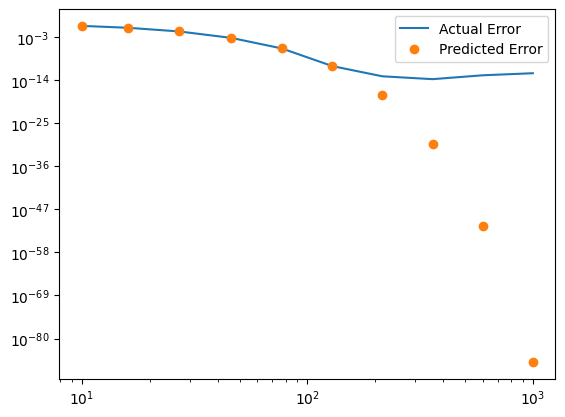

In [14]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.loglog(ns, err, label="Actual Error")
ax.loglog(ns, theoretical, 'o', label="Predicted Error")
ax.legend()

We also plot the error in the prediction of the error:

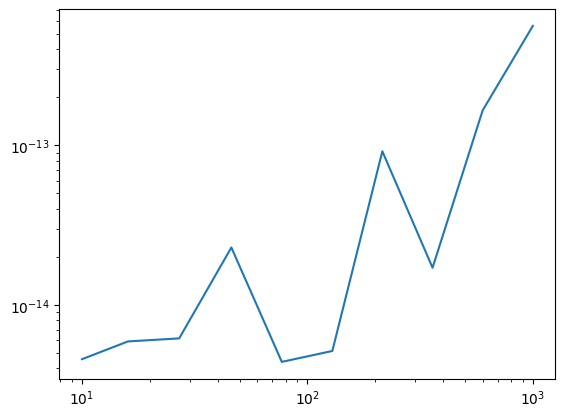

In [15]:
fig, ax = plt.subplots()
ax.loglog(ns, error_in_error)